In [1]:
import pandas as pd
import numpy as np
import plotly.express as px
from sklearn.preprocessing import OneHotEncoder
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.neighbors import KNeighborsRegressor
from sklearn.tree import DecisionTreeRegressor
from sklearn.tree import plot_tree
from sklearn.ensemble import RandomForestRegressor
from sklearn.compose import make_column_transformer
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import mean_squared_error
from sklearn.pipeline import Pipeline
from sklearn.inspection import permutation_importance
from sklearn.model_selection import GridSearchCV

In [2]:
df = pd.read_csv('cleaned.csv')
df

,Unnamed: 0.1,Unnamed: 0,name,hp,atk,def,spa,spd,spe,BST,weightkg,type1,type2,generation,tier,tiernum,weightlog,genstr
0,0,0,Venusaur,80,82,83,100,100,80,525,100.0,Grass,Poison,1,PU,3,4.605170,1
1,1,1,Charizard,78,84,78,109,85,100,534,90.5,Fire,Flying,1,ZU,1,4.505350,1
2,2,2,Blastoise,79,83,100,85,105,78,530,85.5,Water,Water,1,RUBL,8,4.448516,1
3,3,3,Arbok,60,95,69,65,79,80,448,65.0,Poison,Poison,1,ZU,1,4.174387,1
4,4,4,Pikachu,35,55,40,50,50,90,320,6.0,Electric,Electric,1,ZU,1,1.791759,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
485,485,485,Iron Boulder,90,120,80,68,108,124,590,162.5,Rock,Psychic,9,UUBL,10,5.090678,9
486,486,486,Iron Crown,90,72,100,122,108,98,590,156.0,Steel,Psychic,9,OU,11,5.049856,9
487,487,487,Terapagos,90,65,85,65,85,60,450,6.5,Normal,Normal,9,Uber,12,1.871802,9
488,488,488,Terapagos-Stellar,160,105,110,130,110,85,700,77.0,Normal,Normal,9,Uber,12,4.343805,9


In [3]:
X = df[['weightlog','hp','atk','def','spa','spd','spe','BST','type1','type2','generation']]
y = df['tiernum']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 20)

#### Baseline Model

In [4]:
y = df['tiernum']
baseline = np.ones(len(y))*y.mean()
mean_squared_error(y,baseline)

17.176280716368176

#### Multiple Regression Model

In [5]:
categorical = ['type1','type2','generation']

transformer = make_column_transformer((OneHotEncoder(drop='first'), categorical), remainder = 'passthrough')

In [6]:
model = Pipeline(steps=[
    ('preprocessor', transformer),
    ('regressor', LinearRegression())
])

In [7]:
model.fit(X_train, y_train)

Pipeline(steps=[('preprocessor',
                 ColumnTransformer(remainder='passthrough',
                                   transformers=[('onehotencoder',
                                                  OneHotEncoder(drop='first'),
                                                  ['type1', 'type2',
                                                   'generation'])])),
                ('regressor', LinearRegression())])

In [8]:
y_pred = model.predict(X_test)
y_train_pred = model.predict(X_train)


In [9]:
mrm_mse = mean_squared_error(y_test, y_pred)
print(f"Mean Squared Error: {mrm_mse}")

mrm_mse_train = mean_squared_error(y_train, y_train_pred)
print(f"Training Mean Squared Error: {mrm_mse_train}")

Mean Squared Error: 8.790845995366018
Training Mean Squared Error: 7.974547367239075


In [10]:
lr = model.named_steps['regressor']
coeffecients = lr.coef_
names = transformer.get_feature_names_out()
pd.DataFrame(coeffecients,names)


,0
onehotencoder__type1_Dark,-0.358274
onehotencoder__type1_Dragon,1.018124
onehotencoder__type1_Electric,0.019427
onehotencoder__type1_Fairy,-1.544791
onehotencoder__type1_Fighting,0.202268
onehotencoder__type1_Fire,-0.275836
onehotencoder__type1_Flying,-1.157582
onehotencoder__type1_Ghost,-0.310175
onehotencoder__type1_Grass,-1.235389
onehotencoder__type1_Ground,0.870899


In [11]:
r = permutation_importance(model, X_test, y_test, n_repeats = 10)
pd.DataFrame(r['importances_mean'], index = X_train.columns.tolist())

,0
weightlog,0.013997
hp,0.035975
atk,0.003481
def,0.023767
spa,-0.000761
spd,0.008484
spe,0.040723
BST,0.688880
type1,0.034296
type2,0.016337


The multiple regression model was able to outperform the baseline, with a MSE of 8.8 compared to the baseline's 17. The training data had a somewhat lower MSE of 8, which is understandable given that the dataset is on the small side for how many different variables there are, especially with the categorical variables.

As expected, BST was by far the most important input. Interestingly, generation was the second most important, helping to confirm the existence of power-creep in the Pokemon scene, showing that newer pokemon are more likely to be competitively viable compared to older mons.

Among the individual stats, speed was by far the most important, which makes sense. Although there are certain team compositions revolving around a move called "Trick Room" that actually prefers slower pokemon, it seems that there weren't enough to make a significant impact on the model. The other stats individually weren't very important; attack and sp.defense even have negative coeffecients. This also makes sense; a Pokemon will only ever use one of its physical or special stats, so having higher values in one statistic can even be a *waste* if your other statistic is even higher.

*this is *extra* true for attack stats, but still applies even for defensive stats. Defensively-oriented Pokemon are generally built to be a wall for either phsyical *or* special damage, and it's up to the player's abilities to keep the opponent's physical attackers matched up against your phsyical walls, and vice versa

#### K-Nearest Neighbors Regression Model

Next, I wanted to try using a KNN model. Because our data is not uniformly distributed and is extremely heavily right skewed, KNN, which makes no assumptions about the underlying distribution, may be a good fit.

In [12]:
categorical = ['type1','type2','generation']
numerical = [i for i in list(X.columns) if i not in categorical]

# now with standardscaler to stop large magnitude variables from dominating
transformer = make_column_transformer(
    (OneHotEncoder(drop='first'), categorical),  # One-hot encode categorical columns
    (StandardScaler(), numerical),  # Scale numerical columns
    remainder='passthrough'
)

In [13]:
knn = Pipeline(steps=[
    ('preprocessor', transformer),
    ('regressor', KNeighborsRegressor())
])

In [14]:
# Define hyperparamters for different number of neighbors
param_grid = {
    'regressor__n_neighbors': [3, 5, 10, 15, 20, 25, 30, 40, 50]
}

# Grid search with cross-validation
grid_search = GridSearchCV(knn, param_grid, cv=5, scoring='neg_mean_squared_error')
grid_search.fit(X_train, y_train)

#
print("Best K:", grid_search.best_params_.get('regressor__n_neighbors'))

Best K: 15


In [15]:
# use 15
knn = grid_search.best_estimator_

In [16]:
y_pred = knn.predict(X_test)
y_train_pred = knn.predict(X_train)

In [17]:
knn_mse = mean_squared_error(y_test, y_pred)
print(f"Mean Squared Error: {knn_mse}")

knn_mse_train = mean_squared_error(y_train, y_train_pred)
print(f"Training Mean Squared Error: {knn_mse_train}")

Mean Squared Error: 7.579637188208617
Training Mean Squared Error: 8.543185941043083


In [18]:
r = permutation_importance(knn, X_test, y_test, n_repeats = 10)
pd.DataFrame(r['importances_mean'], index = X_train.columns.tolist())

,0
weightlog,-0.005329
hp,0.039430
atk,0.017041
def,0.050710
spa,0.009259
spd,-0.018683
spe,0.049389
BST,0.150975
type1,0.000897
type2,0.009167


On the test data, the KNN model outperforms both baseline and the multiple regression model, with an MSE of 7.58. Interestingly, the model actually performed significantly worse on the training data, worse than even the multiple regression model with an MSE of 8.54. This indicates that the KNN model performs very well on unseen data and is not overfitting to the training dataset.

Once again, BST is by far the most important feature for determing a Pokemon's viability Speed continues to be the most important of the generally-not-impactful individual stat totals.

Generation is barely considered by the KNN model. I think that this is likely due to me categorizing generation as a categorical variable, which made it difficult for the KNN model to utilize it properly.

Similarly, the KNN is also very bad at utilizing the typing data. This makes sense, as typing is a categorical variable with neither order or magnitude, which makes it difficult for a KNN to model properly.

#### Decision Tree Regression Model

Like KNN, decision tree regression models do not assume anything about distributions and are also very good with non-linear relationships. Additionally, they do not carry any restrictions with categorical variables the way that KNN does, which may make it better at fully utilizing our data and the categorical typing/generation data.

In [19]:
transformer = make_column_transformer((OneHotEncoder(drop='first'), categorical), remainder = 'passthrough') # back to no scaler, unneccesary for decision tree

In [20]:
# new pipeline for decision tree

tree = Pipeline(steps=[
    ('preprocessor', transformer),
    ('dtr', DecisionTreeRegressor())
])

In [21]:
train_scores = []
test_scores = []
depths = range(1,31)

# try many max depths to find the most accurate one that doesn't overfit training data

for d in depths:
    tree.set_params(dtr__max_depth=d)
    tree.fit(X_train, y_train)
    y_pred_train = tree.predict(X_train)
    y_pred_test = tree.predict(X_test)
    train_scores.append(mean_squared_error(y_train, y_pred_train))
    test_scores.append(mean_squared_error(y_test, y_pred_test))

In [22]:
dtr_scores = pd.DataFrame({
    'Depth': depths,
    'Train MSE': train_scores,
    'Test MSE': test_scores
})

dtr_scores

,Depth,Train MSE,Test MSE
0,1,11.788787,8.972781
1,2,10.478127,7.196436
2,3,9.301470,7.245728
3,4,7.964582,7.411312
4,5,6.767797,7.481336
5,6,5.383989,8.498942
6,7,4.535054,9.003572
7,8,3.690957,9.734298
8,9,2.757076,11.057669
9,10,2.089787,10.800559


In [23]:
px.line(dtr_scores, x='Depth', y=['Train MSE', 'Test MSE'], 
                  labels={'Depth': 'Max Depth', 'value': 'Mean Squared Error'},
                  title='Decision Tree Depth vs. Test + Train Accuracy')

# the lowest test MSE comes at max depth = 3

In [24]:
# optimal max depth is 3
tree.set_params(dtr__max_depth=3)
tree.fit(X_train, y_train)

Pipeline(steps=[('preprocessor',
                 ColumnTransformer(remainder='passthrough',
                                   transformers=[('onehotencoder',
                                                  OneHotEncoder(drop='first'),
                                                  ['type1', 'type2',
                                                   'generation'])])),
                ('dtr', DecisionTreeRegressor(max_depth=3))])

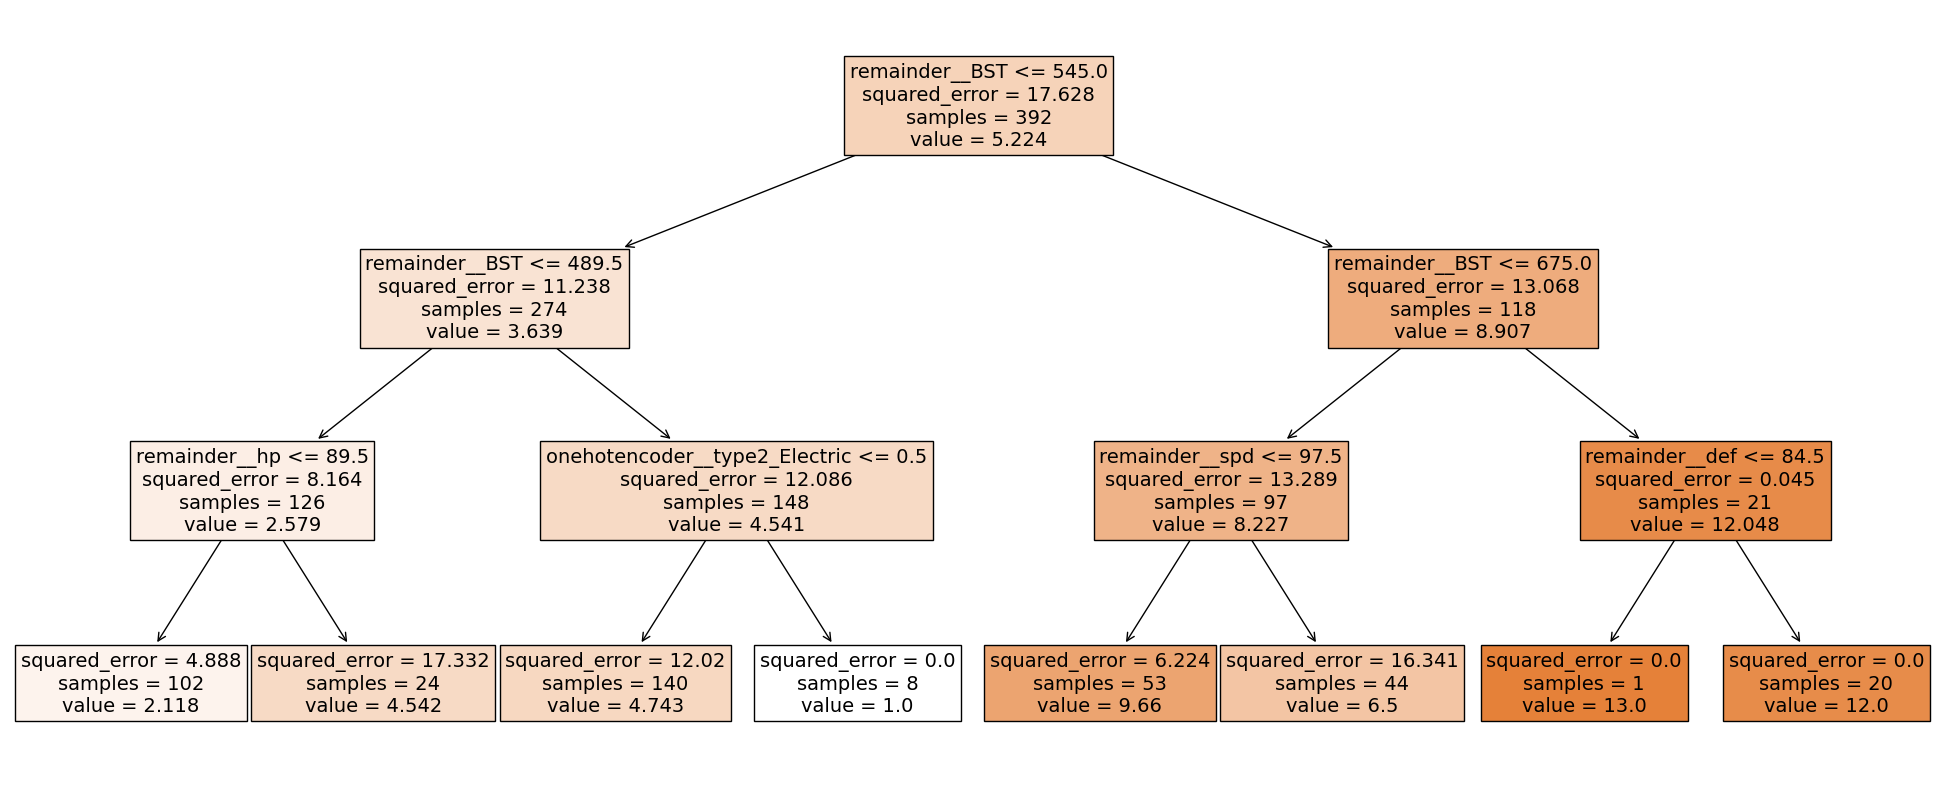

In [25]:
import matplotlib.pyplot as plt # booooo matplotlib

#plot the tree
plt.figure(figsize=(25, 10))
plot_tree(tree.named_steps['dtr'], filled=True, feature_names=transformer.get_feature_names_out().tolist(), fontsize=14);

In [26]:
y_pred = tree.predict(X_test)
y_train_pred = tree.predict(X_train)

In [27]:
tree_mse = mean_squared_error(y_test, y_pred)
print(f"Mean Squared Error: {tree_mse}")

tree_train = mean_squared_error(y_train, y_train_pred)
print(f"Training Mean Squared Error: {tree_train}")

Mean Squared Error: 7.245728272757112
Training Mean Squared Error: 9.301469944446781


In [28]:
r = permutation_importance(tree, X_test, y_test, n_repeats = 10)
pd.DataFrame(r['importances_mean'], index = X_train.columns.tolist())

,0
weightlog,0.000000
hp,0.048075
atk,0.000000
def,0.000738
spa,0.000000
spd,0.007470
spe,0.000000
BST,0.986426
type1,0.000000
type2,0.032550


Although the training MSE is somehow even worse at 9.30, the decision tree regression model has our best test MSE thus far at 7.20. As stated before, I think that this improvement may be in part due to the tree's ability to make better use of categorical variables, in particular the Pokemon's generation.

BST is yet again far and away the most important statistic, and speed is still the most important of the individual stats. The tree actually makes use of generation data this time, since decision tree regression models are much better equipped to handle categorical variables.

Unfortunately, the 'optimal' maximum depth of 3 presents itself as a severe limitation for our model. Because of this low max depth, the model never had a chance to make much use of most of our data, entirely ignoring sp.Attack, and most of the different typings.

#### Random Forest Regression Model

The biggest shortcoming of my decision tree regression model was its shallow depth. A random forest may improve this, combining multiple trees and hopefully allowing for a model that doesn't underfit as much as before

In [29]:
forest = Pipeline(steps=[
    ('preprocessor', transformer),
    ('rf', RandomForestRegressor())
])

In [30]:
# Define the hyperparameter grid
param_grid = {
    'rf__n_estimators': [50, 100, 150, 200, 250, 300],  # Number of trees in the forest
    'rf__max_depth': range(1,21),    # Maximum depth of each tree
}

# Grid search again
grid_search = GridSearchCV(forest, param_grid, cv=5, scoring='neg_mean_squared_error', n_jobs=-1)
grid_search.fit(X_train, y_train)

# Display the best parameters from GridSearchCV
print(f"Best Parameters: {grid_search.best_params_}")


Best Parameters: {'rf__max_depth': 17, 'rf__n_estimators': 250}


In [31]:
# 12 max depth and 100 trees
forest = grid_search.best_estimator_

In [32]:
y_pred = forest.predict(X_test)
y_train_pred = forest.predict(X_train)

In [33]:
forest_mse = mean_squared_error(y_test, y_pred)
print(f"Mean Squared Error: {forest_mse}")

forest_mse_train = mean_squared_error(y_train, y_train_pred)
print(f"Training Mean Squared Error: {forest_mse_train}")

Mean Squared Error: 6.173503310884482
Training Mean Squared Error: 1.1770771669481623


In [34]:
r = permutation_importance(forest, X_test, y_test, n_repeats = 10)
pd.DataFrame(r['importances_mean'], index = X_train.columns.tolist())

,0
weightlog,-0.004538
hp,0.029477
atk,0.005269
def,0.038907
spa,0.035313
spd,0.025518
spe,0.044777
BST,0.642938
type1,0.004339
type2,0.020030


The random forest model has the best performance out of all of the models tested thus far. While this model has an issue with overfitting, with an incredibly low training MSE of 1.18, its test MSE is still the best by a significant margin at 6.04.

BST is once again the most important statistic by a massive margin. Surprisingly, generation data is mostly ignored by the forest. This is likely an artifact of the model overfitting the training data. While generation is a great 'general' predictor of a Pokemon's power the variety of Pokemon within each generation make it difficult for the model to make hyper-accurate predictions. 

#### Summary of Findings

All 4 models that I used outperformed the baseline predictor at determining a Pokemon's viability in Smogon Singles. From worst to best performing, the models I used were the following: Multiple Linear Regression, K-Nearest Neighbors Regression, Decision Tree Regression, and Random Forest Regression.

##### Key Findings:

- The __Random Forest Model__ was the most effective. Despite it somewhat overfitting the training data, its significantly greater depth compared to the tree and other models allowed it to still do the best.

- __Most important features__: BST was far and away the most impactful value; every model had it as by far the most important predictor of a Pokemon's performance. 

- __Unimportant features__: However, individual stat columns were much less useful; out of the 6, none were particularly important, but Speed was consistently the "best of the worst". Weight was also not useful; as stated in the exploratory notebook, it's likely that the prevalence of weight-based moves is a result of heavy Pokemon being good, not the other way around.

- __Power-creep__: Generation was either completely ignored by models or the second most important variable second only to BST. Although the random forest did not have the same kind of limitations as KNN models pertaining to categorical variables, it still did not place much importance on a Pokemon's generation. It seems that a Pokemon's generation is very useful for making a general estimate of a Pokemon's viability, but the variety in every generation prevents it from being as accurate as other variables. However, this still somewhat proves the existence of powercreep, showing that Pokemon are still likely to be more viable the newer they are.

##### Improvements:

There are two areas in particular that I think have much room to improve.

- __Quantifying Viability__: Simply converting Smogon tiers into a line of integers leaves an extremely skewed distribution, as more and more Pokemon increasingly get pushed into the catch-all 'ZU' tier. Additionally, too many Pokemon become clumped in each tier; limiting the precision of this dataset. In addition to finding a way to more uniformly distribute Pokemon across a scale, if would be nice to also incorporate Pokemon's usage rates across tiers to better seperate the hundreds of Pokemon stuck in ZU. This data is [publicly available](https://www.smogon.com/stats/), but would be a massive pain to actually save and wrangle.

- __Abilities and Learnsets__: As stated in b2, There is simply too large of a variety in Pokemon abilities and learnsets to incorporate in simpler models such as these. An idea would be to first categorize abilities/moves seperately, by using human-generated rankings of how good specific abilities/moves are. You could even categorize them by 'utility', i.e. define each one as being offensive/defensive/utility/support oriented, which might also help models make better use of individual stat values. However, no such dataset exists yet to my knowledge.